In [118]:
%matplotlib inline
from pathlib import Path
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [119]:
BC = pd.read_csv('Cereals.csv')

In [120]:
BC.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [121]:
len(BC)

77

In [122]:
BC['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [123]:
BC['type'].unique()

array(['C', 'H'], dtype=object)

The quantitative/numerical variables are calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups and rating. The ordinal variable is type and the nominal variable is mfr

In [124]:
Numerical = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']

In [125]:
BC.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [126]:
pd.DataFrame({'mean': BC[Numerical].mean(),
              'median': BC[Numerical].median(),
              'min': BC[Numerical].min(),
              'max': BC[Numerical].max(),
              'sd': BC[Numerical].std()     
             })

,mean,median,min,max,sd
calories,106.883117,110.000000,50.000000,160.000000,19.484119
protein,2.545455,3.000000,1.000000,6.000000,1.094790
fat,1.012987,1.000000,0.000000,5.000000,1.006473
sodium,159.675325,180.000000,0.000000,320.000000,83.832295
fiber,2.151948,2.000000,0.000000,14.000000,2.383364
carbo,14.802632,14.500000,5.000000,23.000000,3.907326
sugars,7.026316,7.000000,0.000000,15.000000,4.378656
potass,98.666667,90.000000,15.000000,330.000000,70.410636
vitamins,28.246753,25.000000,0.000000,100.000000,22.342523
shelf,2.207792,2.000000,1.000000,3.000000,0.832524


In [127]:
BC.dropna(how = 'any', inplace = True)

In [128]:
BC.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

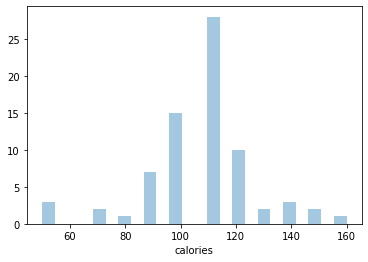

In [129]:
sns.distplot(BC['calories'], kde=False)

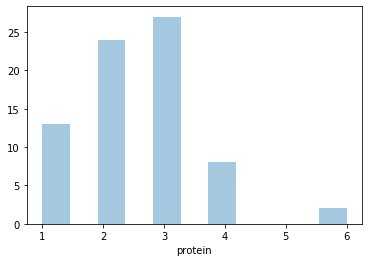

In [130]:
sns.distplot(BC['protein'], kde=False)

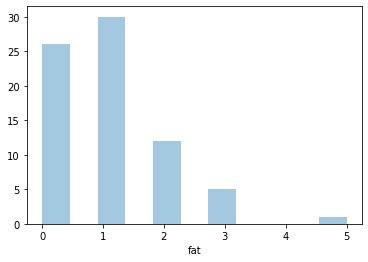

In [131]:
sns.distplot(BC['fat'], kde=False)

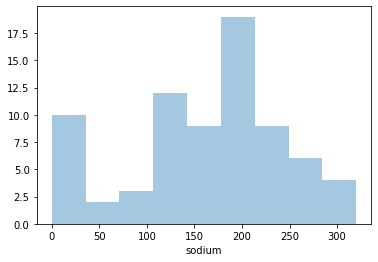

In [132]:
sns.distplot(BC['sodium'], kde=False)

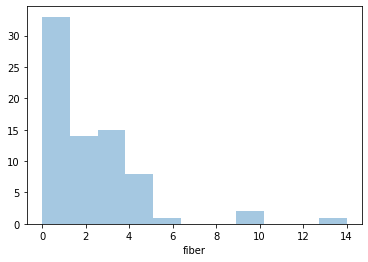

In [133]:
sns.distplot(BC['fiber'], kde=False)

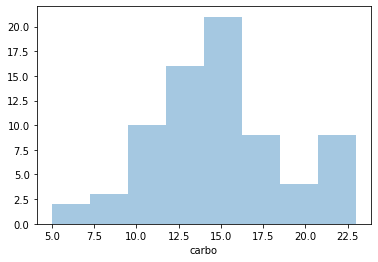

In [139]:
sns.distplot(BC['carbo'], kde=False)

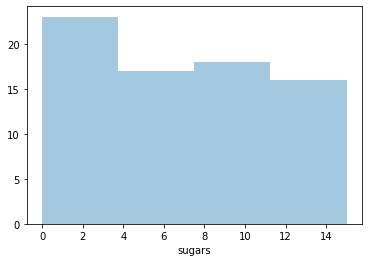

In [140]:
sns.distplot(BC['sugars'], kde=False)

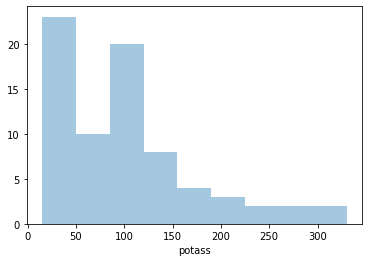

In [141]:
sns.distplot(BC['potass'], kde=False)

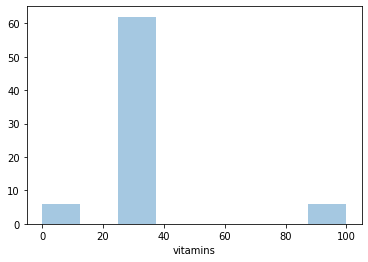

In [134]:
sns.distplot(BC['vitamins'], kde=False)

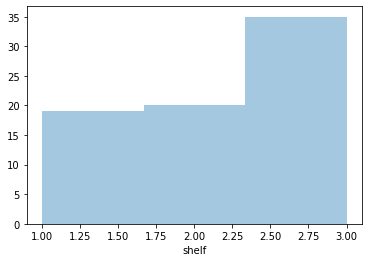

In [135]:
sns.distplot(BC['shelf'], kde=False)

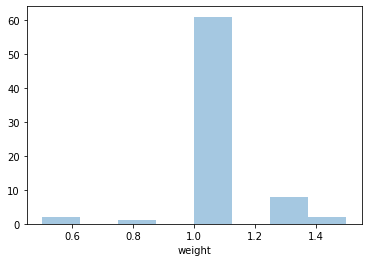

In [136]:
sns.distplot(BC['weight'], kde=False)

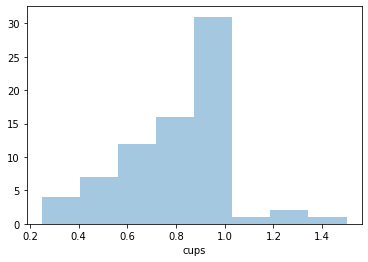

In [137]:
sns.distplot(BC['cups'], kde=False)

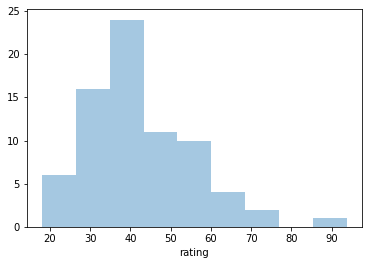

In [138]:
sns.distplot(BC['rating'], kde=False)

The variables with the largest variability are Sodium and Potass. 
The variables that seem skewed are Fiber and Potass
The values that seem extreme: rating(90); weight(0.6, 0.8), vitamins(0,100)
fiber(10,14), fat(5), protein(6), calories(160, 80)

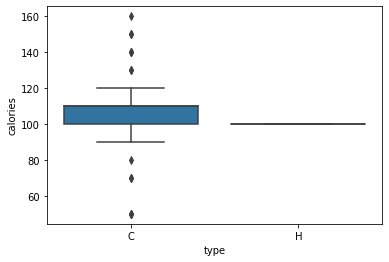

In [143]:
sns.boxplot(x='type', y='calories', data = BC )

The chart above shows us that there is a wider spread of values for cold cereals in terms of their calories. 

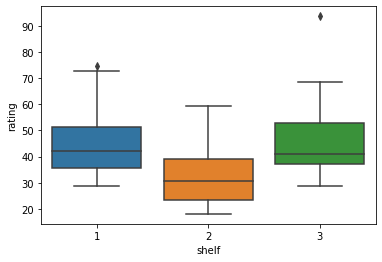

In [144]:
sns.boxplot(x = 'shelf', y = 'rating', data = BC)

If we were to predict consumer rating from shelf height, we do not have to keep all the threee categories of shelf height. We can keep shelf height 1 and 2 alone. 1 and 2 have covered almost all the possible values for rating.

In [146]:
BC.corr().round(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.00,0.03,0.51,0.30,-0.30,0.27,0.57,-0.07,0.26,0.09,0.70,0.09,-0.69
protein,0.03,1.00,0.20,0.01,0.51,-0.04,-0.29,0.58,0.05,0.20,0.23,-0.24,0.47
fat,0.51,0.20,1.00,0.00,0.01,-0.28,0.29,0.20,-0.03,0.28,0.22,-0.16,-0.41
sodium,0.30,0.01,0.00,1.00,-0.07,0.33,0.04,-0.04,0.33,-0.12,0.31,0.12,-0.38
fiber,-0.30,0.51,0.01,-0.07,1.00,-0.38,-0.15,0.91,-0.04,0.31,0.25,-0.51,0.60
carbo,0.27,-0.04,-0.28,0.33,-0.38,1.00,-0.45,-0.37,0.25,-0.19,0.14,0.36,0.06
sugars,0.57,-0.29,0.29,0.04,-0.15,-0.45,1.00,0.00,0.07,0.06,0.46,-0.03,-0.76
potass,-0.07,0.58,0.20,-0.04,0.91,-0.37,0.00,1.00,-0.00,0.39,0.42,-0.50,0.42
vitamins,0.26,0.05,-0.03,0.33,-0.04,0.25,0.07,-0.00,1.00,0.28,0.32,0.13,-0.21
shelf,0.09,0.20,0.28,-0.12,0.31,-0.19,0.06,0.39,0.28,1.00,0.19,-0.35,0.05


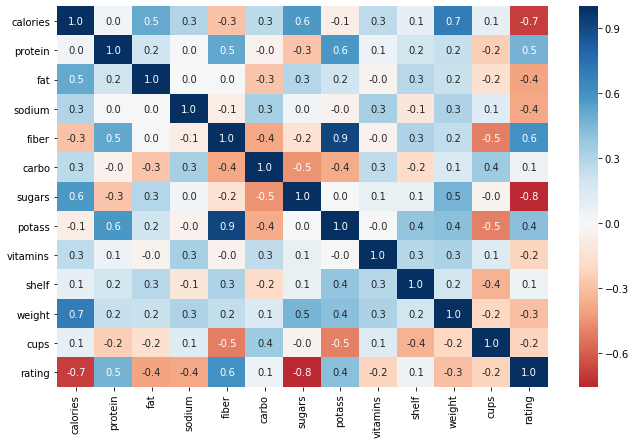

In [148]:
# Matrix plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(BC.corr(), annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

The pair of variables most strongly correlated with rating are calories and sugars. We can reduce the number of variables 
based on these correlations by dropping variables with similar correlation coefficients and keeping just one.

PC1(the first principal component) is the axis that spans the most variation.